# 데이터셋 
: seaborn 과 matplotlib 함께 사용하기

In [1]:
# seaborn(sns)과 pandas(pd) 패키지 import 셋팅

import seaborn as sns
import pandas as pd

In [3]:
# seaborn 패키지의 내장 데이터 사용

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [6]:
# 음식점에서 지불한 팁, 금액, 손님 정보 등을 확인할 수 있는 "tips" 데이터 셋을 활용 => load하여 불러옴

df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
# 데이터 프레임 탐색 - info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [10]:
# 데이터 프레임의 숫자형 데이터 값 분포 확인

df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [11]:
# 범주형(category) 데이터를 가진 컬럼이 어떤 값을 가지는 지 확인 : unigue(), vlaue_count()
# 'sex' 데이터는 2개의 유니크한 값을 가지고 있음

df['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [12]:
# 'sex'컬럼의 값을 확인

df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

## 산점도 (Scatterplot) 
: 점으로 표현한 데이터 시각화 분석

- 비싼 음식을 먹은 사람과 팁의 상관관계 확인

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

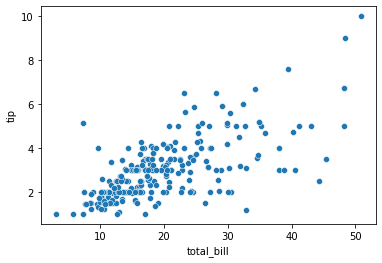

In [18]:
sns.scatterplot(x=df['total_bill'], y=df['tip'])

# 음식가격(total_bill)의 값이 커질수록 팁(tip)의 가격도 증가
# 즉 음식가격(total_bill)과 팁(tip)은 양의 상관관계가 있음

- 음식을 먹은 사람의 성별과 팁의 상관관계 확인

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

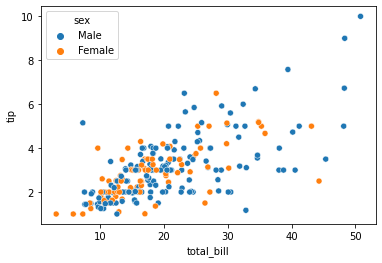

In [19]:
# hue : 그풉핑할 변수(색상)
# 그래프에서 성별(sex)에 따라 어떤 차이가 있는지 확인하기 위해 scatterplot의 hue 속성값을 지정하여 분석

sns.scatterplot(x=df['total_bill'], y=df['tip'], hue=df['sex'])

- 버블차트(Bubble chart) : 크기를 다르게 하여 산점도를 그리는 그래프

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

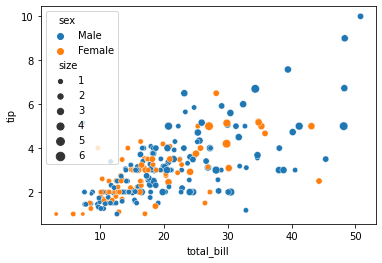

In [21]:
# size : 그룹핑할 변수 (점의 크기) => 여기서는 인원 수
# 버블차트는 값의 크기, 즉 버블의 크기가 크게 차이가 나는 데이터에 유용

sns.scatterplot(x=df['total_bill'], y=df['tip'], hue=df['sex'], size=df['size'])


<div>
[Tip] 표시할 데이커가 적을 때의 산점도와 막대그래프로 시각화
</div>

<AxesSubplot:>

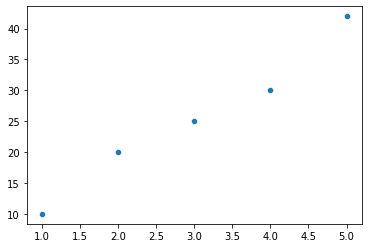

In [22]:
# 표시할 데이커가 적을 때의 산점도

x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 42]
sns.scatterplot(x=x, y=y)

<AxesSubplot:>

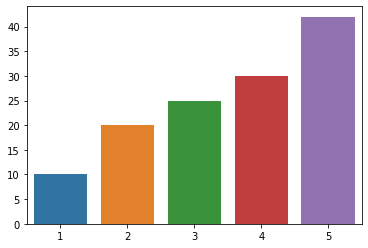

In [23]:
# 같은 데이터를 막대그래프 시각화

sns.barplot(x=x, y=y)

# 회귀선
- 회귀란 사전적인 의미로 '한 바퀴 돌아서 본디의 자리나 상태로 돌아오는것'
- 데이터가 아무리 흩어져 있어도 상관관계가 있는 값이라면 본질적으로 나타내는 경향이 있기 마련
- 회귀 선(regplot)은 개별 데이터 분포를 대표할 수 있는 하나의 선인 회귀선(regression)을 표시하는 그래프

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

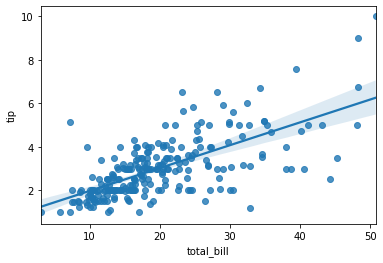

In [26]:
# regplot을 그리기 위해 x축과 y축의 값을 입력
# 'tips' 데이터 셋을 이용하여 regplot 시각화 => scatterplot과 함께 하나의 선이 생성

sns.regplot(x=df['total_bill'], y=df['tip'])

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

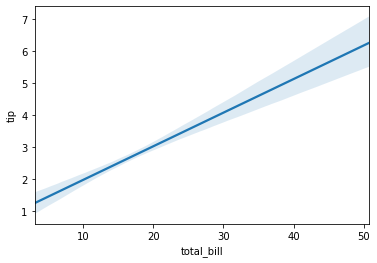

In [31]:
# 회귀선만 표시하고 싶은 경우, scatter 속성을 False로 설정
# 기존에 데이터 분포가 회귀선을 기준으로 얼마나 퍼져 있는지 확인하는데 도움을 줌

sns.regplot(x=df['total_bill'], y=df['tip'], scatter = False)

# 회귀식

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

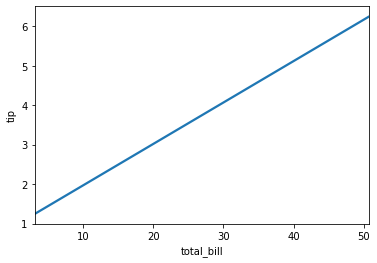

In [32]:
# 신뢰구간을 표시하지 않으려면 ci=None으로 설정합니다 (ci = 신뢰구간:기본95%)

sns.regplot(x=df['total_bill'], y=df['tip'], scatter = False, ci = None)

<div>
[실습] 그동안했던 자료에 지금까지 배운 기법을 활용, 대입해보자
</div>

# 선그래프(lineplot)

<AxesSubplot:>

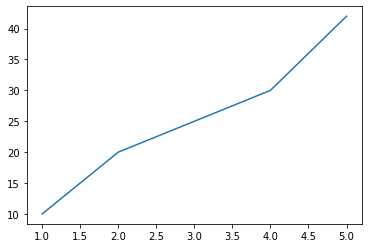

In [33]:
# 임의의 리스트 2개를 생성하여 선 그래프를 생성한 후 확인

x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 42]
sns.lineplot(x=x, y=y)

<AxesSubplot:xlabel='size', ylabel='tip'>

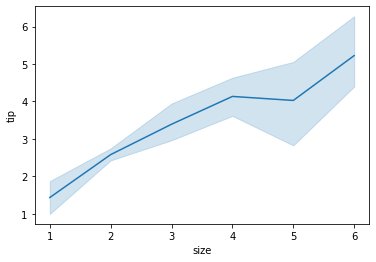

In [34]:
# 'tips' 데이터를 사용해서 선그래프를 생성

sns.lineplot(x=df['size'], y=df['tip'])

- 신뢰구간 변경

In [36]:
# size가 5일 때, tip의 최소값과 최대값을 확인하면 각각 2.0, 5.14

print("min:{}, max:{}".format(min(df[df['size'] == 5]['tip']), max(df[df['size'] == 5]['tip'])))

min:2.0, max:5.14


<AxesSubplot:xlabel='size', ylabel='tip'>

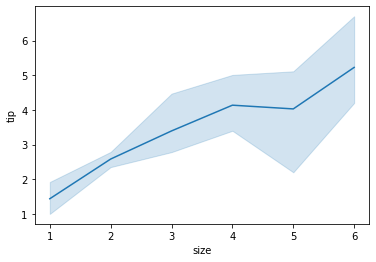

In [38]:
# 모든 데이터가 빠짐없이 다 표시되기를 원한다면 ci=100 설정

sns.lineplot(x=df['size'], y=df['tip'], ci=100)

<AxesSubplot:xlabel='size', ylabel='tip'>

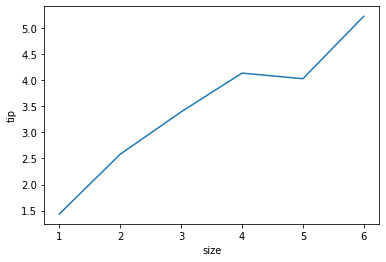

In [39]:
# 신뢰구간을 표시하고 싶지 않다면 ci=None으로 설정

sns.lineplot(x=df['size'], y=df['tip'], ci=None)

<AxesSubplot:xlabel='size', ylabel='tip'>

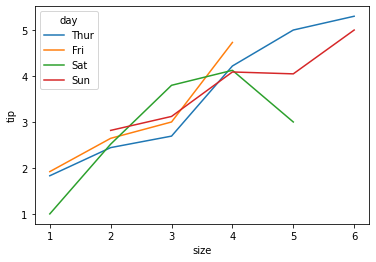

In [40]:
# 선그래프도 hue 옵션을 사용해서 색상을 달리하여 표시할 수 있음
# hue는 범주형(category)변수를 지정하여 활용

sns.lineplot(x=df['size'], y=df['tip'], hue=df['day'], ci=None)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

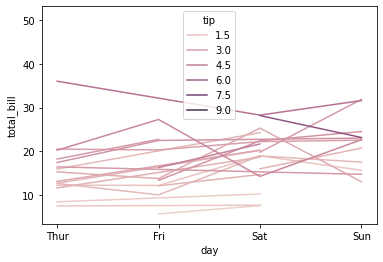

In [81]:
# hue 속성에 여러개의 값이 포함된 변수를 지정한 경우

sns.lineplot(x=df['day'], y=df['total_bill'], hue=df['tip'], ci=None)

## 막대그래프 (barplot, countplot)

<AxesSubplot:xlabel='size', ylabel='tip'>

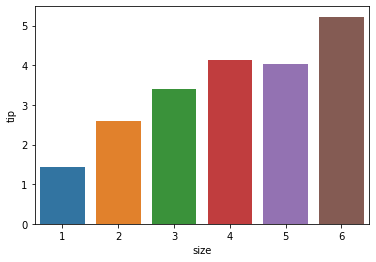

In [41]:
# 'tips' 데이터 셋의 동일한 변수(x=인원수(size), y=팁(tip))를 사용하여 막대그래프를 생성
# 각 size에 따른 tip의 평균값을 막대 길이로 표시
 
sns.barplot(x=df['size'], y=df['tip'], ci=None)

- 막대의 길이가 비슷한 경우

<AxesSubplot:xlabel='day', ylabel='tip'>

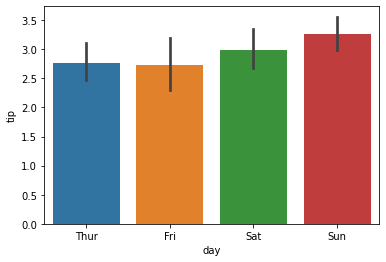

In [42]:
sns.barplot(x=df['day'], y=df['tip'])

<AxesSubplot:xlabel='day', ylabel='count'>

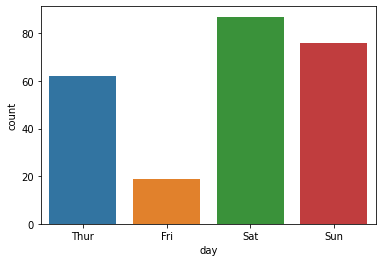

In [43]:
# df['day'].value_counts() 를 시각화 해보자
# seaborn에서는 barplot()과 모양은 유사하지만 y축의 값을 x축 변수의 개수를 표시하는 countplot()도 제공함 

sns.countplot(x=df['day'])

- pointplot

<AxesSubplot:xlabel='day', ylabel='tip'>

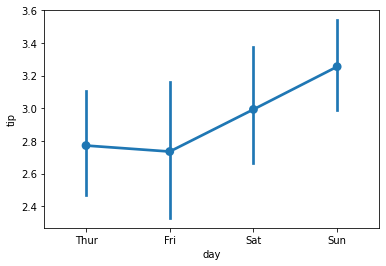

In [46]:
# 막대그래프에서 막대를 제외하고 데이터의 평균값을 선으로 잇고 신뢰구간을 함께 표시한 그래프

sns.pointplot(x=df['day'], y=df['tip'])

## 박스플롯, 바이올린플롯
- 박스플롯(boxplot, 상자그림)는 막대그래프와 유사하게 수치를 길이로 표현하지만 사분위를 함께 시각화

<AxesSubplot:xlabel='size', ylabel='tip'>

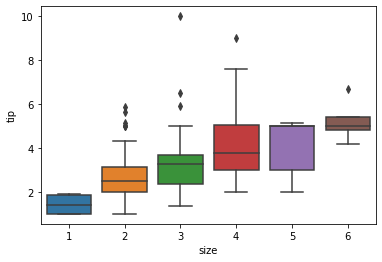

In [48]:
# 막대그래프를 그렸던 동일한 변수(x=인원수(size), y=팁(tip))를 사용하여 박스플롯을 그리기

sns.boxplot(x=df['size'], y=df['tip'])

- 바이올린플롯(violinplot) : 박스플롯과 유사하게 변수의 분포를 한눈에 살펴볼 수 있는 또 다른 그래프

<AxesSubplot:xlabel='size', ylabel='tip'>

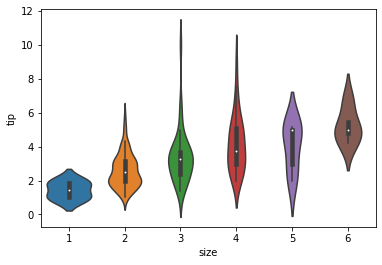

In [49]:
# 박스플롯을 그렸던 동일한 변수(x=인원수(size), y=팁(tip))를 사용하여 바이올린플롯을 그리기

sns.violinplot(x=df['size'], y=df['tip'])

## 히스토그램(histplot)
: 히스토그램(histplot)은 변수의 분포를 막대형 그래프를 사용하여 표시하는 방법

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

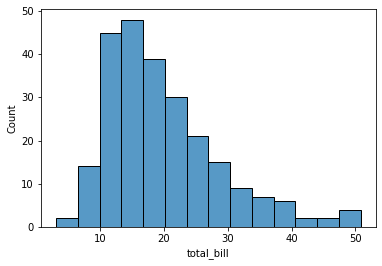

In [50]:
# 'tips' 데이터의 음식가격(total_bill)의 분포를 확인하는 히스토그램 사용
# 음식가격(total_bill)은 값이 상대적으로 작은 경우가 많이 발생한 것을 확인할 수 있음

sns.histplot(data=df['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

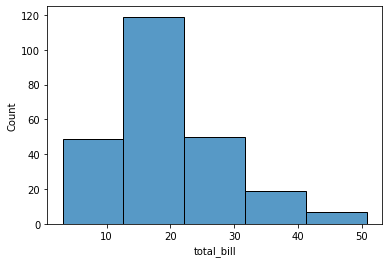

In [51]:
# 막대그래프와 달리 히스토그램은 막대의 간격없이 모두 붙어있음
# 히스토그램의 막대의 개수는 자동으로 생성되고, 임의로 막대의 개수를 지정하여 그릴 수 있음

sns.histplot(data=df['total_bill'], bins = 5)

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

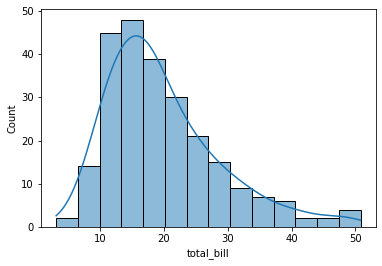

In [54]:
# kde는 데이터의 밀도(Kernel Density Estimation)를 표시한 값으로 
# 히스토그램에서 확인할 수 있는 데이터 분포를 부드럽게 연결선으로 나타냄

sns.histplot(data=df['total_bill'], kde=True)

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

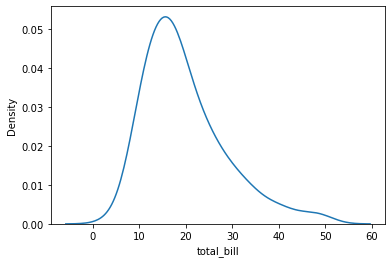

In [56]:
# kdeplot은 앞에서 살펴본 히스토그램에서 kde 속성을 지정하여 그렸던 곡선

sns.kdeplot(data=df['total_bill'])

<AxesSubplot:xlabel='total_bill'>

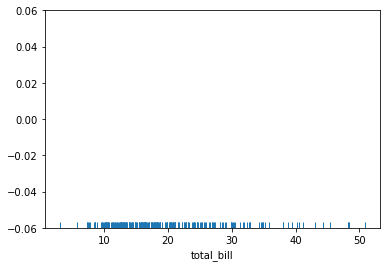

In [57]:
# rugplot은 바닥에 까는 카페트(rug)모양처럼 작은 실모양의 선이 데이터의 분포에 따라 표시되는 그래프

sns.rugplot(data=df['total_bill'])

<AxesSubplot:xlabel='day', ylabel='Count'>

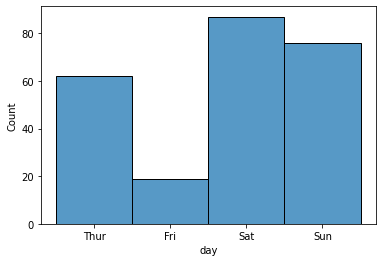

In [59]:
# 범주형 데이터인 요일(day)데이터를 사용하여 히스토그램과 카운트슬롯 그리기

sns.histplot(data=df['day'])

<AxesSubplot:xlabel='day', ylabel='count'>

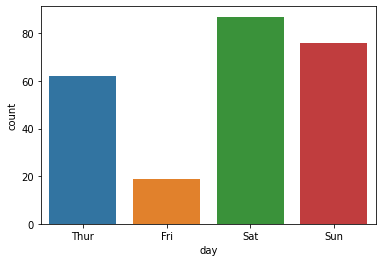

In [60]:
sns.countplot(x=df['day'])

## 히트맵 (heatmap)
- 히트맵은 여러가지 변수를 한번에 비교할 때 유용하게 사용하는 시각화 방법으로, 
- 2차원 격자 모양으로 나누니 각각의 칸에 데이터의 값을 색상으로 표시

In [64]:
# 히트맵을 그리기 위해서 필요한 데이터만 갖도록 변형된 데이터를 새로 생성
# 인원수, 요일에 따른 평균 팁을 표시하도록 피봇 테이블을 생성

pivot_df = df.pivot_table("tip", "day", "size")
pivot_df

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


In [65]:
# 피봇테이블의 값을 개수로 지정
# 피봇테이블의 값 연산을 변경하고 싶다면 aggfunc속서을 지정하여 변경할 수 있음

df.pivot_table("tip", "day", "size", aggfunc="count")

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


<AxesSubplot:xlabel='size', ylabel='day'>

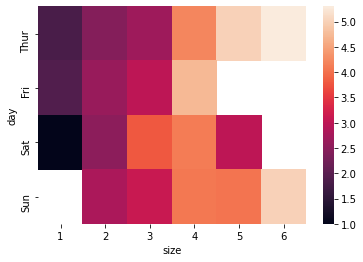

In [66]:
# 피봇 형태로 변형한 데이터(pivot_df)를 사용하여 히트맵을 생성
# 히트맵 우측에 새상표를 참고하여 해석할 수 있음 : 색상이 밝아질 수록 큰값, 어두워질수록 작은값
# 흰색으로 표시된 값은 결측치(NaN)

sns.heatmap(pivot_df)

In [69]:
# 결측치를 0으로 변환하여 다시 히트맵을 확인

pivot_df.fillna(0, inplace=True)
pivot_df

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,0.000000,0.0
Sat,1.00,2.517547,3.797778,4.123846,3.000000,0.0
Sun,0.00,2.816923,3.120667,4.087778,4.046667,5.0


<AxesSubplot:xlabel='size', ylabel='day'>

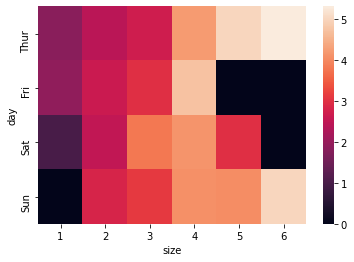

In [70]:
# 기존에 NaN으로 표시되었던 값이 모두 0으로 치환 후 다시 히트맵을 생성
# 0이 추가되어 기존에 흰색으로 표시된 영역이 검정색으로 표시됨

sns.heatmap(pivot_df)

<AxesSubplot:xlabel='size', ylabel='day'>

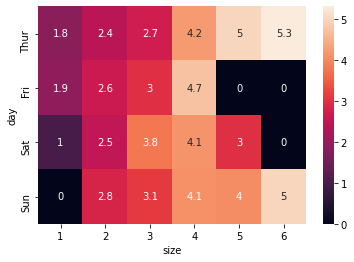

In [80]:
# 히트맵은 색상을 기반으로 값의 분포와 경향성을 파악하지만, 구체적으로 값을 확인할 수 있음
# heatmap의 annot 속성을 True로 지정하면 값을 함께 표시할 수 있음

# 컬러를 바꾸려면 cmap="YlGnBu"

sns.heatmap(pivot_df, annot=True)